In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

folder_path = "./data/"

In [2]:
def get_df_and_truth(data_list, truth_list, cols=['Chr', 'START_POS_REF', 'END_POS_REF']):
    
    df_res = []
    truth_res = []
    for data_name, truth_name in zip(data_list, truth_list):
        data_path = folder_path + f"snv-parse-{data_name}.txt"
        df = pd.read_csv(data_path, sep='\t', low_memory=False)
        truth_path = folder_path + f"{data_name}/{truth_name}.bed"
        truth = pd.read_csv(truth_path, sep='\t', header=None, names = ['Chr', 'START_POS_REF', 'END_POS_REF'])
        truth['label'] = 1
        df_res.append(df)
        truth_res.append(truth)

    return df_res, truth_res

In [3]:
data_list = ["real1", "real2_part1", "syn1", "syn2", "syn3", "syn4", "syn5"]
truth_list = ["real1_truth", "real2_truth_chr1to5", "syn1_truth", "syn2_truth", "syn3_truth", "syn4_truth", "syn5_truth"]
    
df_list, truth_list = get_df_and_truth(data_list, truth_list)
merged_list = [df.merge(truth, how='left').fillna({'label':0}) for df, truth in zip(df_list, truth_list)]

In [ ]:
merged_list[0].head()

,Chr,START_POS_REF,END_POS_REF,REF,ALT,REF_MFVdVs,ALT_MFVdVs,Sample_Name,FILTER_Mutect2,FILTER_Freebayes,FILTER_Vardict,FILTER_Varscan,m2_MQ,f_MQMR,vs_SSC,vs_SPV,vd_SSF,vd_MSI,label
0,1,13110,13110,G,A,G/NA/G/G/,A/NA/A/A/,icgc_cll-T,True,False,False,False,41.91,NaN,2.0,0.522430,0.23427,2.0,0.0
1,1,15015,15015,G,C,G/NA/NA/G/,C/NA/NA/C/,icgc_cll-T,True,False,False,False,43.42,NaN,5.0,0.302390,NaN,NaN,0.0
2,1,16949,16949,A,C,NA/NA/NA/A/,NA/NA/NA/C/,icgc_cll-T,False,False,False,True,NaN,NaN,16.0,0.023282,NaN,NaN,0.0
3,1,40552,40552,T,C,NA/NA/NA/T/,NA/NA/NA/C/,icgc_cll-T,False,False,False,True,NaN,NaN,26.0,0.002231,NaN,NaN,0.0
4,1,46907,46907,T,C,NA/NA/NA/T/,NA/NA/NA/C/,icgc_cll-T,False,False,False,True,NaN,NaN,17.0,0.017670,NaN,NaN,0.0


In [ ]:
merged_list[0].apply(lambda x: x.unique(), axis=0)

Chr                 [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2,...
START_POS_REF       [13110, 15015, 16949, 40552, 46907, 63236, 632...
END_POS_REF         [13110, 15015, 16949, 40552, 46907, 63236, 632...
REF                                                      [G, A, T, C]
ALT                                                      [A, C, T, G]
REF_MFVdVs          [G/NA/G/G/, G/NA/NA/G/, NA/NA/NA/A/, NA/NA/NA/...
ALT_MFVdVs          [A/NA/A/A/, C/NA/NA/C/, NA/NA/NA/C/, NA/NA/NA/...
Sample_Name                                              [icgc_cll-T]
FILTER_Mutect2                                          [True, False]
FILTER_Freebayes                                        [False, True]
FILTER_Vardict                                          [False, True]
FILTER_Varscan                                          [False, True]
m2_MQ               [41.91, 43.42, nan, 44.56, 50.25, 43.6, 44.15,...
f_MQMR              [nan, 24.8077, 35.7667, 15.5294, 0.0, 27.6, 59...
vs_SSC              

In [ ]:
merged_list[0].apply(lambda x: len(x.unique()), axis=0)

Chr                    73
START_POS_REF       49294
END_POS_REF         49294
REF                     4
ALT                     4
REF_MFVdVs             60
ALT_MFVdVs            590
Sample_Name             1
FILTER_Mutect2          2
FILTER_Freebayes        2
FILTER_Vardict          2
FILTER_Varscan          2
m2_MQ                2086
f_MQMR               4412
vs_SSC                206
vs_SPV              20521
vd_SSF               6683
vd_MSI                 52
label                   2
dtype: int64

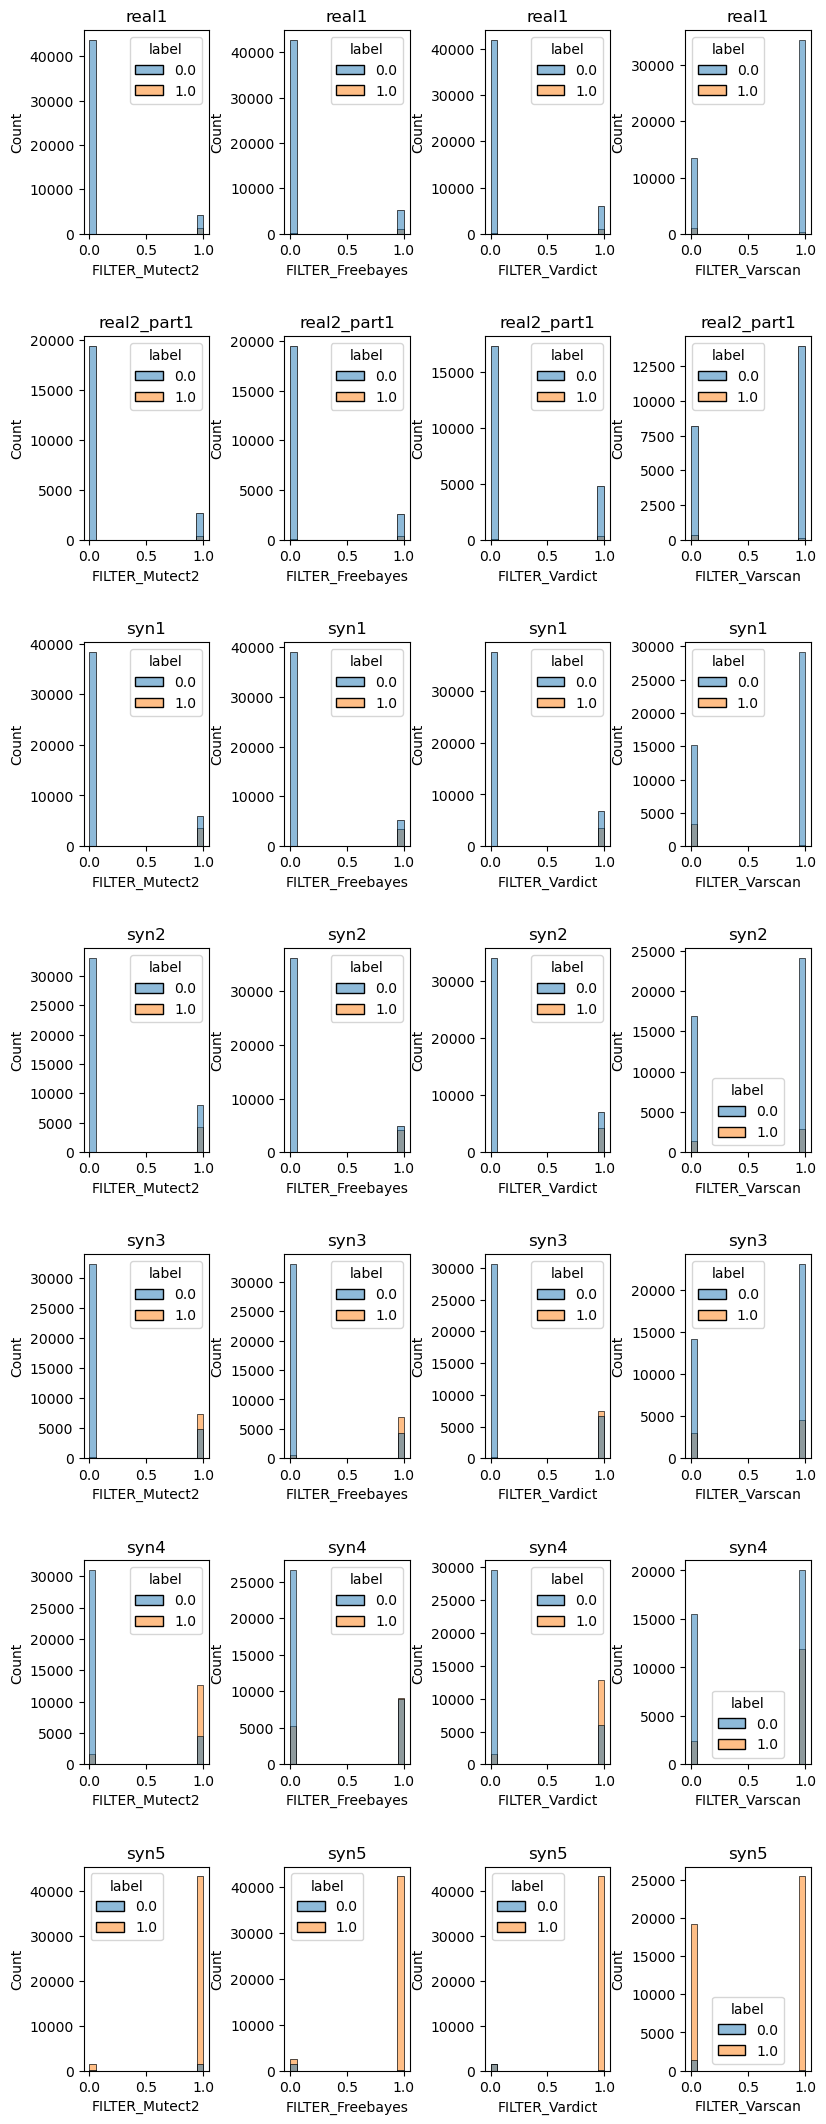

In [ ]:
col_list = ["FILTER_Mutect2", "FILTER_Freebayes", "FILTER_Vardict", "FILTER_Varscan"]

fig, axes = plt.subplots(nrows=len(df_list), ncols=len(col_list), figsize=(2 * len(col_list), 3 * len(df_list)))
plt.tight_layout()
plt.subplots_adjust(wspace=0.6, hspace=0.5)

for i, (df, truth, merged, name) in enumerate(zip(df_list, truth_list, merged_list, data_list)):
    for j, col in enumerate(col_list):
        ax = sns.histplot(merged, x=col, hue='label', ax=axes[i][j])
        ax.set_title(name)

In [ ]:
merged_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49320 entries, 0 to 49319
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Chr               49320 non-null  object 
 1   START_POS_REF     49320 non-null  int64  
 2   END_POS_REF       49320 non-null  int64  
 3   REF               49320 non-null  object 
 4   ALT               49320 non-null  object 
 5   REF_MFVdVs        49320 non-null  object 
 6   ALT_MFVdVs        49320 non-null  object 
 7   Sample_Name       49320 non-null  object 
 8   FILTER_Mutect2    49320 non-null  bool   
 9   FILTER_Freebayes  49320 non-null  bool   
 10  FILTER_Vardict    49320 non-null  bool   
 11  FILTER_Varscan    49320 non-null  bool   
 12  m2_MQ             8719 non-null   float64
 13  f_MQMR            7537 non-null   float64
 14  vs_SSC            39668 non-null  float64
 15  vs_SPV            39668 non-null  float64
 16  vd_SSF            16076 non-null  float6

In [ ]:
merged_list[0].head()

,Chr,START_POS_REF,END_POS_REF,REF,ALT,REF_MFVdVs,ALT_MFVdVs,Sample_Name,FILTER_Mutect2,FILTER_Freebayes,FILTER_Vardict,FILTER_Varscan,m2_MQ,f_MQMR,vs_SSC,vs_SPV,vd_SSF,vd_MSI,label
0,1,13110,13110,G,A,G/NA/G/G/,A/NA/A/A/,icgc_cll-T,True,False,False,False,41.91,NaN,2.0,0.522430,0.23427,2.0,0.0
1,1,15015,15015,G,C,G/NA/NA/G/,C/NA/NA/C/,icgc_cll-T,True,False,False,False,43.42,NaN,5.0,0.302390,NaN,NaN,0.0
2,1,16949,16949,A,C,NA/NA/NA/A/,NA/NA/NA/C/,icgc_cll-T,False,False,False,True,NaN,NaN,16.0,0.023282,NaN,NaN,0.0
3,1,40552,40552,T,C,NA/NA/NA/T/,NA/NA/NA/C/,icgc_cll-T,False,False,False,True,NaN,NaN,26.0,0.002231,NaN,NaN,0.0
4,1,46907,46907,T,C,NA/NA/NA/T/,NA/NA/NA/C/,icgc_cll-T,False,False,False,True,NaN,NaN,17.0,0.017670,NaN,NaN,0.0


In [ ]:
tot_df.apply(lambda x: len(x.unique()))

Chr                     86
START_POS_REF       295589
END_POS_REF         295589
REF                      5
ALT                      4
REF_MFVdVs              61
ALT_MFVdVs            2070
Sample_Name              7
FILTER_Mutect2           2
FILTER_Freebayes         2
FILTER_Vardict           2
FILTER_Varscan           2
m2_MQ                 3170
f_MQMR               20395
vs_SSC                 250
vs_SPV               62040
vd_SSF               19317
vd_MSI                  63
data_name                7
dtype: int64

In [ ]:
tot_df.apply(lambda x: x.unique())

Chr                 [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2,...
START_POS_REF       [13110, 15015, 16949, 40552, 46907, 63236, 632...
END_POS_REF         [13110, 15015, 16949, 40552, 46907, 63236, 632...
REF                                                   [G, A, T, C, N]
ALT                                                      [A, C, T, G]
REF_MFVdVs          [G/NA/G/G/, G/NA/NA/G/, NA/NA/NA/A/, NA/NA/NA/...
ALT_MFVdVs          [A/NA/A/A/, C/NA/NA/C/, NA/NA/NA/C/, NA/NA/NA/...
Sample_Name         [icgc_cll-T, icgc_mbl-T, dream1-T, dream2-T, d...
FILTER_Mutect2                                          [True, False]
FILTER_Freebayes                                        [False, True]
FILTER_Vardict                                          [False, True]
FILTER_Varscan                                          [False, True]
m2_MQ               [41.91, 43.42, nan, 44.56, 50.25, 43.6, 44.15,...
f_MQMR              [nan, 24.8077, 35.7667, 15.5294, 0.0, 27.6, 59...
vs_SSC              

In [ ]:
# Can probably encode this as a feature
df_list[0]['REF_MFVdVs'].apply(lambda x: len(x.split('/'))).agg(["max", "min"])

max    5
min    5
Name: REF_MFVdVs, dtype: int64

In [ ]:
tmp = pd.json_normalize(parsed_snvs['mutect'][0:100], sep='_')

In [ ]:
len({str(tuple(d.items())) for d in parsed_snvs['mutect']})

199642

In [ ]:
import pandas as pd

tmp = pd.DataFrame.from_dict({i:p in enumerate(parsed_snvs['mutect'][1:5])}, orient='index')

AttributeError: 'list' object has no attribute 'values'

In [ ]:
tmp

,CHROM,POS,REF,ALT,QUAL,FILTER,INFO,sample_name,"GTRecord(CHROM=1, POS=13079, REF=C, ALT=[G])","GTRecord(CHROM=1, POS=13110, REF=G, ALT=[A])","GTRecord(CHROM=1, POS=13281, REF=C, ALT=[G])"
0,1,13079,C,[G],None,"[MinAF, map_qual, normal_artifact, strand_bias]","{'CONTQ': 93.0, 'ClippingRankSum': 5.219, 'DP'...",icgc_cll_tumour,0/1,NaN,NaN
1,1,13110,G,[A],None,"[map_qual, normal_artifact]","{'CONTQ': 93.0, 'ClippingRankSum': 1.784, 'DP'...",icgc_cll_normal,NaN,0/0,NaN
2,1,13110,G,[A],None,"[map_qual, normal_artifact]","{'CONTQ': 93.0, 'ClippingRankSum': 1.784, 'DP'...",icgc_cll_tumour,NaN,0/1,NaN
3,1,13281,C,[G],None,"[MinAF, map_qual, normal_artifact, weak_evidence]","{'CONTQ': 93.0, 'ClippingRankSum': 3.634, 'DP'...",icgc_cll_normal,NaN,NaN,0/0


In [ ]:
parsed_snvs['mutect'][1:5]

[{'CHROM': '1',
  'POS': 13079,
  'REF': 'C',
  'ALT': '[G]',
  'QUAL': None,
  'FILTER': ['MinAF', 'map_qual', 'normal_artifact', 'strand_bias'],
  'INFO': {'CONTQ': 93.0,
   'ClippingRankSum': 5.219,
   'DP': 420,
   'ECNT': 2,
   'FS': 6.675,
   'GERMQ': 93,
   'MBQ': [36, 40],
   'MFRL': [414, 424],
   'MMQ': [27, 24],
   'MPOS': [24],
   'MQ': 29.62,
   'MQ0': 0,
   'MQRankSum': -5.227,
   'NALOD': [-12.61],
   'NLOD': [21.99],
   'POPAF': [6.0],
   'ReadPosRankSum': -2.874,
   'SEQQ': 48,
   'STRANDQ': 2,
   'TLOD': [11.68],
   'ANN': ['G|downstream_gene_variant|MODIFIER|WASH7P|ENSG00000227232|transcript|ENST00000438504|unprocessed_pseudogene||n.*1284G>C|||||1284|',
    'G|downstream_gene_variant|MODIFIER|WASH7P|ENSG00000227232|transcript|ENST00000541675|unprocessed_pseudogene||n.*1284G>C|||||1284|',
    'G|downstream_gene_variant|MODIFIER|WASH7P|ENSG00000227232|transcript|ENST00000423562|unprocessed_pseudogene||n.*1284G>C|||||1284|',
    'G|downstream_gene_variant|MODIFIER|WASH7

In [ ]:
parsed_snvs

defaultdict(list, {})

In [ ]:
l = [t['MFRL'] for t in tmp]

In [ ]:
len(parsed_snvs['mutect']), len(parsed_snvs['freebayes']), len(parsed_snvs['varscan']), len(parsed_snvs['vardict'])

(199642, 399648, 399748, 399658)

In [ ]:
parsed_snvs['mutect'][2]

{'CHROM': '1',
 'POS': 13110,
 'REF': 'G',
 'ALT': '[A]',
 'QUAL': None,
 'FILTER': ['map_qual', 'normal_artifact'],
 'INFO': {'CONTQ': 93.0,
  'ClippingRankSum': 1.784,
  'DP': 333,
  'ECNT': 2,
  'FS': 42.864,
  'GERMQ': 93,
  'MBQ': [38, 37],
  'MFRL': [416, 409],
  'MMQ': [27, 25],
  'MPOS': [41],
  'MQ': 30.37,
  'MQ0': 0,
  'MQRankSum': -4.68,
  'NALOD': [-15.89],
  'NLOD': [10.32],
  'POPAF': [6.0],
  'ReadPosRankSum': -0.572,
  'SEQQ': 93,
  'STRANDQ': 4,
  'TLOD': [35.89],
  'ANN': ['A|downstream_gene_variant|MODIFIER|WASH7P|ENSG00000227232|transcript|ENST00000438504|unprocessed_pseudogene||n.*1253C>T|||||1253|',
   'A|downstream_gene_variant|MODIFIER|WASH7P|ENSG00000227232|transcript|ENST00000541675|unprocessed_pseudogene||n.*1253C>T|||||1253|',
   'A|downstream_gene_variant|MODIFIER|WASH7P|ENSG00000227232|transcript|ENST00000423562|unprocessed_pseudogene||n.*1253C>T|||||1253|',
   'A|downstream_gene_variant|MODIFIER|WASH7P|ENSG00000227232|transcript|ENST00000488147|unprocess

In [ ]:
pd.read_